In [88]:
#deteccion de objetos
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

In [89]:
#abrio mi fit filtro v (imagen reduccioda)
imagenV = fits.open('Img_V.fits')[0]

#extraemos data y header
dataV = imagenV.data
headerV = imagenV.header
headerV

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'Martinez, Oyarzo, Vargas' / SBIGFITSEXT The name of the observer     
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{7524519a-ed8c-4d

In [90]:
#Obtenemos el "umbral" que utilizaremos para detectar las fuentes EN EL FILTRO V
thresholdV = detect_threshold(dataV, nsigma=3)
#Utilizamos el umbral y la imagen para detectar fuentes
sourV = detect_sources(dataV, thresholdV, npixels=10)
#Mostramos el número de fuentes detectadas
sourV

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 1575
labels: [   1    2    3    4    5 ... 1571 1572 1573 1574 1575]

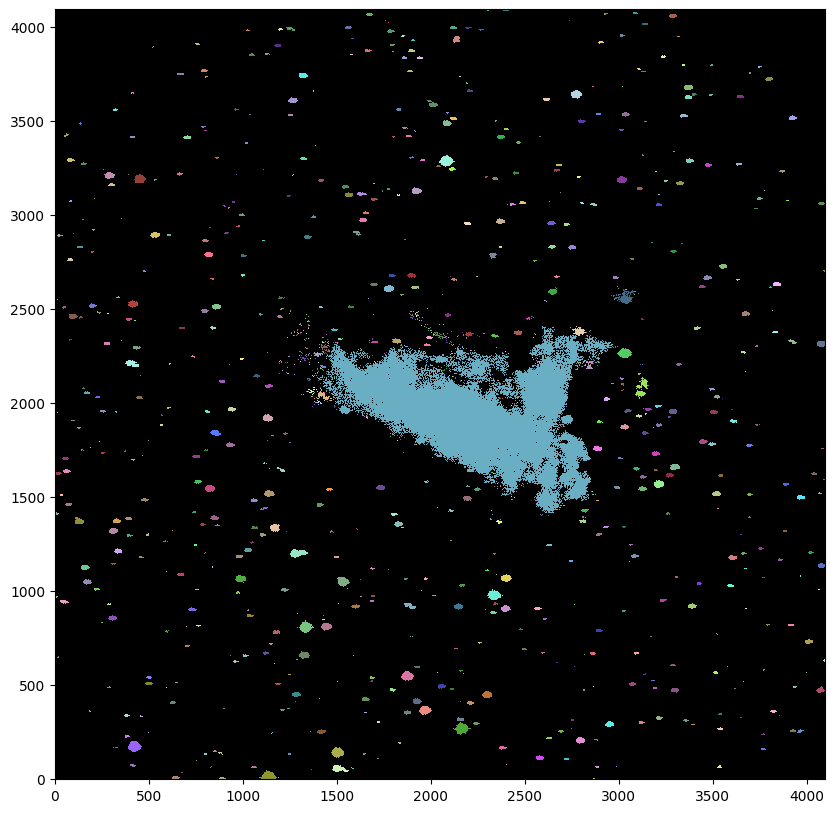

In [91]:
#Generamos un mapa de color para cada fuente del filtro V
cmap_sourV = sourV.make_cmap(seed=123)
#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sourV, origin='lower', cmap=cmap_sourV, interpolation='nearest')
plt.show()

In [92]:
# separamos las fuentes 
sour_deblend = deblend_sources(dataV, sourV, npixels=10, nlevels=32, contrast=1)
#esto muestra el numero de fuentes detectadas
sour_deblend

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 1575
labels: [   1    2    3    4    5 ... 1571 1572 1573 1574 1575]

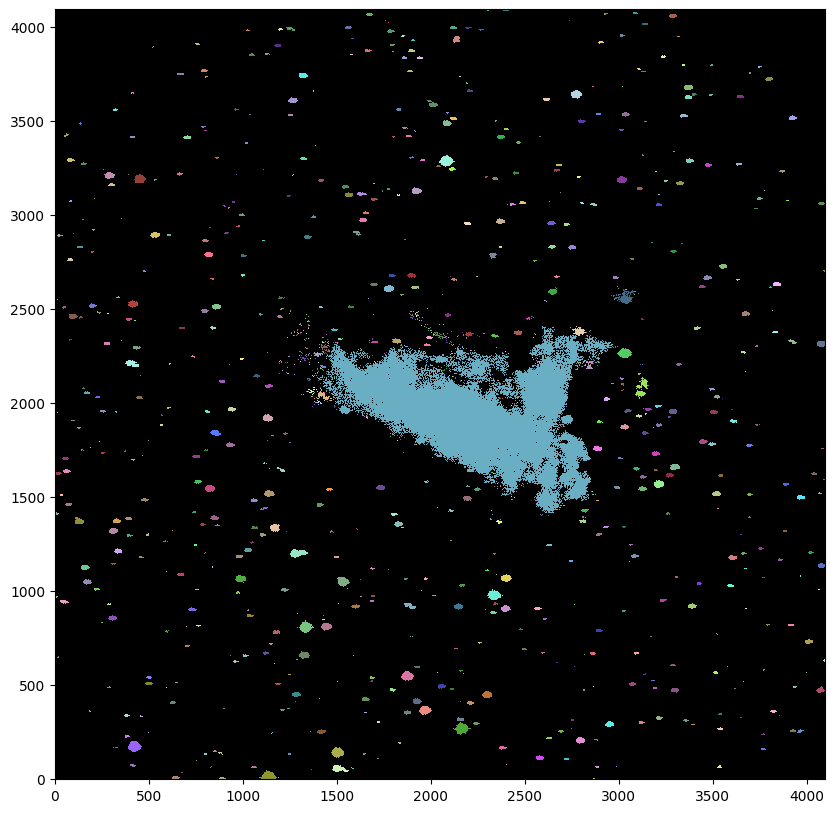

In [93]:
cmap_deblend = sour_deblend.make_cmap(seed=123)
#muesta las fuentes detectadas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sour_deblend, origin='lower', cmap= cmap_deblend, interpolation='nearest')
plt.show()

In [94]:
#OBTENEMOS EL CATALOGO DE FITS REDUCIDO PARA EL FILTRO V
cat = SourceCatalog(dataV, sour_deblend)
#pasamos el catalogo a una tabla (solo con los datos que nos interesan)
tb1 = cat.to_table()
tablav = tb1['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
#label: numero id de la fuente'
#xcentroid, ycentroid: coordenadas'
#area: tamaño en pixeles'
#segment_flux: flojo total (no es el real pq no cuenta el tiempo de exp)'

tablav


label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,640.2320480687358,6.52205991567157,603.0,64565.091342926025
2,887.7563941471707,2.6187466028882675,265.0,23196.957691192627
3,1134.7822850715727,9.146347683381725,2698.0,3399665.4651412964
4,2867.6832861160897,0.8001967929849486,16.0,823.2751312255859
5,1190.3229102984467,7.213934489674612,15.0,752.757209777832
6,675.7119933648777,32.94744482505579,59.0,3021.3730964660645
7,1504.5813086948608,54.71876976846527,2104.0,383277.05516815186
8,1363.479004560766,49.504166981503104,59.0,3050.061740875244


In [95]:
#calculamos el flujo real 
tablav['segment_flux'] = tablav['segment_flux']/headerV['EXPTIME']
tablav

label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,640.2320480687358,6.52205991567157,603.0,2152.1697114308677
2,887.7563941471707,2.6187466028882675,265.0,773.2319230397542
3,1134.7822850715727,9.146347683381725,2698.0,113322.18217137655
4,2867.6832861160897,0.8001967929849486,16.0,27.442504374186196
5,1190.3229102984467,7.213934489674612,15.0,25.0919069925944
6,675.7119933648777,32.94744482505579,59.0,100.71243654886881
7,1504.5813086948608,54.71876976846527,2104.0,12775.901838938395
8,1363.479004560766,49.504166981503104,59.0,101.66872469584148


In [96]:
#CALCULAMOS MAG APARENTES CON EL ZEROPONIT 
#puse un valor falso x mientras
zeropoint = 39.34044722557779
tablav['magnitude'] = zeropoint - 2.5*np.log(tablav['segment_flux'])
tablav

label,xcentroid,ycentroid,area,segment_flux,magnitude
,,,pix2,,
int32,float64,float64,float64,float64,float64
1,640.2320480687358,6.52205991567157,603.0,2152.1697114308677,20.15486777467459
2,887.7563941471707,2.6187466028882675,265.0,773.2319230397542,22.713999642095008
3,1134.7822850715727,9.146347683381725,2698.0,113322.18217137655,10.245471699383131
4,2867.6832861160897,0.8001967929849486,16.0,27.442504374186196,31.060214560642997
5,1190.3229102984467,7.213934489674612,15.0,25.0919069925944,31.28408381664805
6,675.7119933648777,32.94744482505579,59.0,100.71243654886881,27.809773992876003
7,1504.5813086948608,54.71876976846527,2104.0,12775.901838938395,15.70215720901199
8,1363.479004560766,49.504166981503104,59.0,101.66872469584148,27.78614789896696


In [97]:
#Mostramos las magnitudes
np.sort(tablav['magnitude'])

3.9202512844196065
10.245471699383131
10.785372855953675
11.226192779782899
11.32477461309287
11.435523570131132
11.732671453855108
11.865297309520418
12.075846148626425
12.487188096242008
12.727908560097077


In [98]:
#ahora para filtro b, abro mi fit filtro b (imagen reduccioda)
imagenB = fits.open('Img_B.fits')[0]

#extraemos data y header
dataB = imagenB.data
headerB = imagenB.header
headerB

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'Martinez, Oyarzo, Vargas' / SBIGFITSEXT The name of the observer     
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{36922ce2-fadc-41

In [99]:
#Obtenemos el "umbral" que utilizaremos para detectar las fuentes EN EL FILTRO b
thresholdB = detect_threshold(dataB, nsigma=2.5)
#Utilizamos el umbral y la imagen para detectar fuentes
sourB = detect_sources(dataB, thresholdB, npixels=10)
#Mostramos el número de fuentes detectadas
sourB

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 1902
labels: [   1    2    3    4    5 ... 1898 1899 1900 1901 1902]

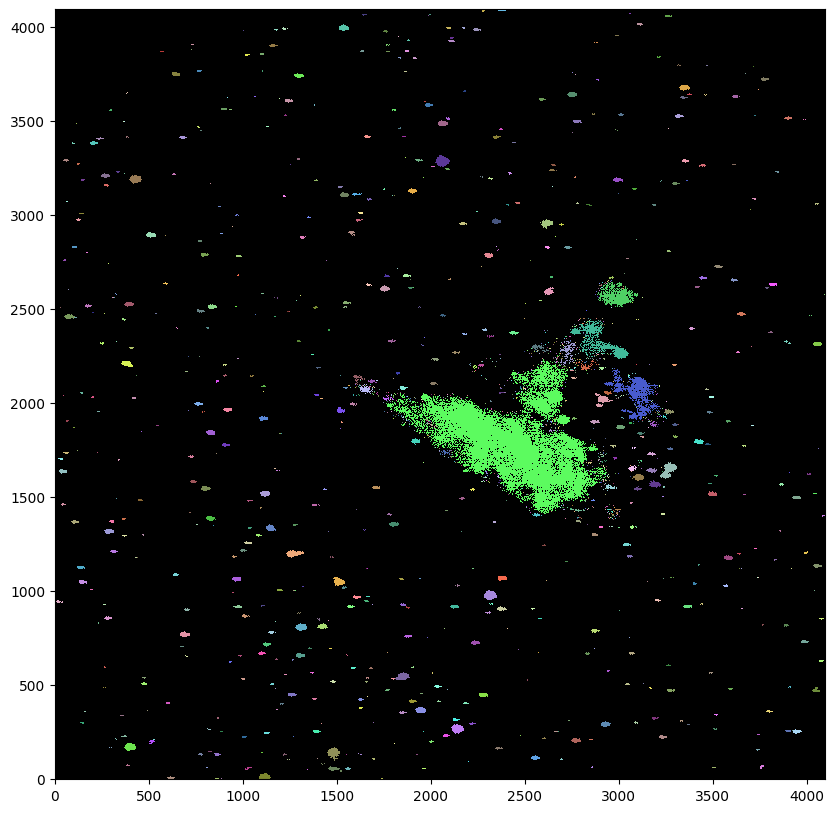

In [100]:
#Generamos un mapa de color para cada fuente del filtro B
cmap_sourB = sourB.make_cmap(seed=123)
#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sourB, origin='lower', cmap=cmap_sourB, interpolation='nearest')
plt.show()

In [101]:
# separamos las fuentes 
sour_deblendB = deblend_sources(dataB, sourB, npixels=10, nlevels=32, contrast=1)
#esto muestra el numero de fuentes detectadas
sour_deblendB

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 1902
labels: [   1    2    3    4    5 ... 1898 1899 1900 1901 1902]

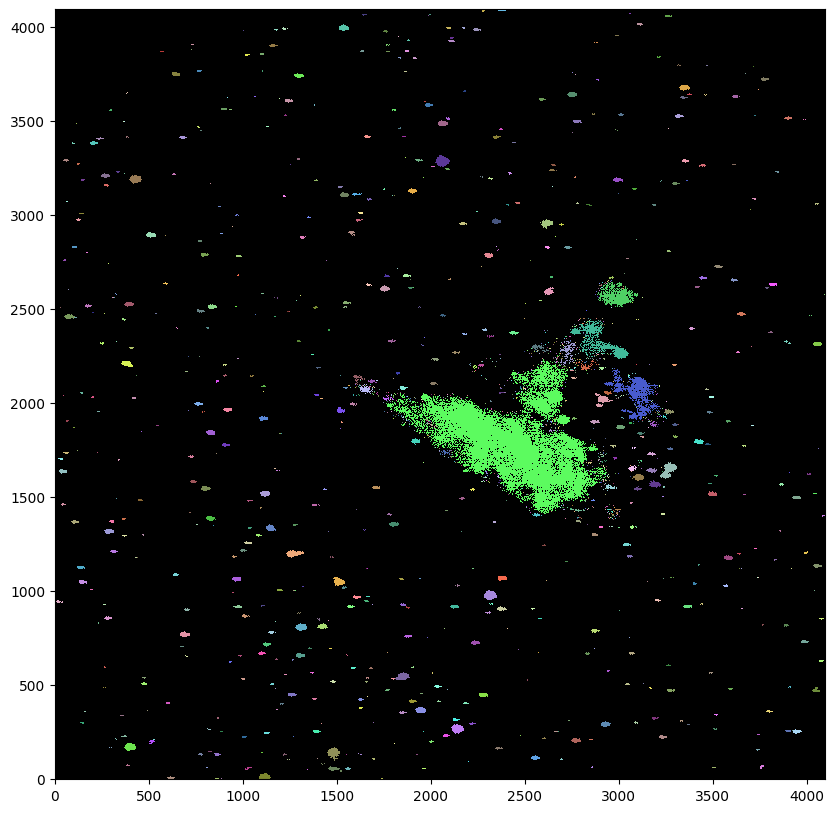

In [102]:
cmap_deblendB = sour_deblendB.make_cmap(seed=123)
#muesta las fuentes detectadas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sour_deblendB, origin='lower', cmap= cmap_deblendB, interpolation='nearest')
plt.show()

In [103]:
#OBTENEMOS EL CATALOGO DE FITS REDUCIDO PARA EL FILTRO B
catB = SourceCatalog(dataB, sour_deblendB)
#pasamos el catalogo a una tabla (solo con los datos que nos interesan)
tb1B = catB.to_table()
tablaB = tb1B['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
#label: numero id de la fuente'
#xcentroid, ycentroid: coordenadas'
#area: tamaño en pixeles'
#segment_flux: flujo total (no es el real pq no cuenta el tiempo de exp)'

tablaB


label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,616.5231619890303,5.2066814105234585,435.0,18111.79485321045
2,860.9517558954312,1.281705036478892,95.0,3011.5761432647705
3,1111.2352667702407,8.072728039357788,1597.0,495179.61865615845
4,1741.2259059241887,1.570038234767417,69.0,1916.9007778167725
5,884.0795521412875,2.4641660405435353,11.0,426.8147964477539
6,1378.4104529791193,27.457029194697807,10.0,543.9501667022705
7,1481.1797406195446,53.70497121154867,1203.0,68259.36726951599
8,1343.246945532124,48.57697626534069,19.0,486.3267192840576


In [104]:
#calculamos el flujo real 
tablaB['segment_flux'] = tablaB['segment_flux']/headerB['EXPTIME']
tablaB

label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,616.5231619890303,5.2066814105234585,435.0,603.726495107015
2,860.9517558954312,1.281705036478892,95.0,100.38587144215902
3,1111.2352667702407,8.072728039357788,1597.0,16505.987288538614
4,1741.2259059241887,1.570038234767417,69.0,63.89669259389242
5,884.0795521412875,2.4641660405435353,11.0,14.227159881591797
6,1378.4104529791193,27.457029194697807,10.0,18.131672223409016
7,1481.1797406195446,53.70497121154867,1203.0,2275.3122423172
8,1343.246945532124,48.57697626534069,19.0,16.21089064280192


In [105]:
#CALCULAMOS MAG APARENTES CON EL ZEROPONIT 
#puse un valor falso x mientras
zeropoint = 39.022104169660096
tablaB['magnitude'] = zeropoint - 2.5*np.log(tablaB['segment_flux'])
tablaB

label,xcentroid,ycentroid,area,segment_flux,magnitude
,,,pix2,,
int32,float64,float64,float64,float64,float64
1,616.5231619890303,5.2066814105234585,435.0,603.726495107015,23.014300987887186
2,860.9517558954312,1.281705036478892,95.0,100.38587144215902,27.49955048299109
3,1111.2352667702407,8.072728039357788,1597.0,16505.987288538614,14.74340801955816
4,1741.2259059241887,1.570038234767417,69.0,63.89669259389242,28.628935167285285
5,884.0795521412875,2.4641660405435353,11.0,14.227159881591797,32.384222155897405
6,1378.4104529791193,27.457029194697807,10.0,18.131672223409016,31.77795353048246
7,1481.1797406195446,53.70497121154867,1203.0,2275.3122423172,19.697422741316558
8,1343.246945532124,48.57697626534069,19.0,16.21089064280192,32.05789597397789


In [106]:
#Mostramos las magnitudes
np.sort(tablaB['magnitude'])

7.178522364466822
11.429400870180494
12.302956752245986
13.565400990288296
13.79444796019709
13.829077987786402
13.896791917892163
14.427994057423653
14.439018327398614
14.611916524804322
14.74340801955816
